In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import plot_util
import pathlib

In [2]:
cwd = pathlib.Path.cwd()
input_dir = cwd / 'data'

In [35]:
data = pd.read_csv(input_dir / 'units_byCBSA.csv', index_col=[0, 1])
data.head()

1 unit  2 units  3-4 units  5+ units  2018 Population
CBSA Code Year                                                             
10180     1980-01-01   496.0     14.0       20.0     352.0         128589.0
          1980-01-01    19.0      0.0        0.0       0.0         128589.0
          1980-01-01     0.0      0.0        0.0       0.0         128589.0
          1980-01-01    10.0      0.0        0.0       0.0         128589.0
          1980-01-01     1.0      0.0        0.0       0.0         128589.0

CBSA Info

In [4]:
geo_dir = cwd / 'geo'
cbsa_codes = pd.read_csv(geo_dir / 'CBSA_Codes.csv')
cbsa_codes

,CBSA Code,CBSA Title,State Name
0,10100,"Aberdeen, SD",South Dakota
1,10100,"Aberdeen, SD",South Dakota
2,10140,"Aberdeen, WA",Washington
3,10180,"Abilene, TX",Texas
4,10180,"Abilene, TX",Texas
...,...,...,...
1911,49700,"Yuba City, CA",California
1912,49700,"Yuba City, CA",California
1913,49740,"Yuma, AZ",Arizona
1914,49780,"Zanesville, OH",Ohio


In [5]:
cbsa_codes1 = cbsa_codes.drop_duplicates(subset='CBSA Code').set_index('CBSA Code')
cbsa_codes1

,CBSA Title,State Name
CBSA Code,,
10100,"Aberdeen, SD",South Dakota
10140,"Aberdeen, WA",Washington
10180,"Abilene, TX",Texas
10220,"Ada, OK",Oklahoma
10300,"Adrian, MI",Michigan
...,...,...
49660,"Youngstown-Warren-Boardman, OH-PA",Ohio
49700,"Yuba City, CA",California
49740,"Yuma, AZ",Arizona


In [6]:
ca_codes = cbsa_codes1[cbsa_codes1['State Name'] == 'California']
ca_codes

,CBSA Title,State Name
CBSA Code,,
12540,"Bakersfield, CA",California
17020,"Chico, CA",California
17340,"Clearlake, CA",California
18860,"Crescent City, CA",California
20940,"El Centro, CA",California
21700,"Eureka-Arcata, CA",California
23420,"Fresno, CA",California
25260,"Hanford-Corcoran, CA",California
31080,"Los Angeles-Long Beach-Anaheim, CA",California


In [7]:
cbsa_dict = cbsa_codes1['CBSA Title'].to_dict()
cbsa_state_dict = cbsa_codes1['State Name'].to_dict()

Pivot Tables

In [36]:
data['Single Family'] = data['1 unit']
data['Multifamily'] = data['2 units'] + data['3-4 units'] + data['5+ units']
data.head()

1 unit  2 units  3-4 units  5+ units  2018 Population  \
CBSA Code Year                                                                
10180     1980-01-01   496.0     14.0       20.0     352.0         128589.0   
          1980-01-01    19.0      0.0        0.0       0.0         128589.0   
          1980-01-01     0.0      0.0        0.0       0.0         128589.0   
          1980-01-01    10.0      0.0        0.0       0.0         128589.0   
          1980-01-01     1.0      0.0        0.0       0.0         128589.0   

                      Single Family  Multifamily  
CBSA Code Year                                    
10180     1980-01-01          496.0        386.0  
          1980-01-01           19.0          0.0  
          1980-01-01            0.0          0.0  
          1980-01-01           10.0          0.0  
          1980-01-01            1.0          0.0

In [37]:
df = data.reset_index().pivot_table(index=['CBSA Code', 'Year'], values=['Single Family', 'Multifamily'], aggfunc=np.sum, fill_value=0.)
df.head()

Multifamily  Single Family
CBSA Code Year                                  
10180     1980-01-01          386            569
          1981-01-01          348            550
          1982-01-01         1348            788
          1983-01-01          981           1072
          1984-01-01          678            529

In [50]:
pop = data.groupby(['CBSA Code']).first()['2018 Population']
pop.head()

CBSA Code
10180    128589.0
10420    333829.0
10500    133059.0
10540    116038.0
10580         0.0
Name: 2018 Population, dtype: float64

In [43]:
len(df)

14937

In [44]:
len(pop)

14937

In [45]:
df.to_csv(input_dir / 'totals_by_CBSA.csv')

In [46]:
fractions = df.apply(lambda x: x / df.sum(axis=1))
fractions.head()

Multifamily  Single Family
CBSA Code Year                                  
10180     1980-01-01     0.404188       0.595812
          1981-01-01     0.387528       0.612472
          1982-01-01     0.631086       0.368914
          1983-01-01     0.477837       0.522163
          1984-01-01     0.561723       0.438277

In [31]:
charts_dir = input_dir / 'charts_CA_metros'
charts_dir.mkdir(exist_ok=True)

In [32]:
ca_sub = ca_codes.index.to_list()
ca_names = [cbsa_dict[ix] for ix in ca_sub]
ca_names

['Bakersfield, CA',
 'Chico, CA',
 'Clearlake, CA',
 'Crescent City, CA',
 'El Centro, CA',
 'Eureka-Arcata, CA',
 'Fresno, CA',
 'Hanford-Corcoran, CA',
 'Los Angeles-Long Beach-Anaheim, CA',
 'Madera, CA',
 'Merced, CA',
 'Modesto, CA',
 'Napa, CA',
 'Oxnard-Thousand Oaks-Ventura, CA',
 'Red Bluff, CA',
 'Redding, CA',
 'Riverside-San Bernardino-Ontario, CA',
 'Sacramento-Roseville-Folsom, CA',
 'Salinas, CA',
 'San Diego-Chula Vista-Carlsbad, CA',
 'San Francisco-Oakland-Berkeley, CA',
 'San Jose-Sunnyvale-Santa Clara, CA',
 'San Luis Obispo-Paso Robles, CA',
 'Santa Cruz-Watsonville, CA',
 'Santa Maria-Santa Barbara, CA',
 'Santa Rosa-Petaluma, CA',
 'Sonora, CA',
 'Stockton, CA',
 'Susanville, CA',
 'Truckee-Grass Valley, CA',
 'Ukiah, CA',
 'Vallejo, CA',
 'Visalia, CA',
 'Yuba City, CA']

In [33]:
def convert_to_yyyy(year):
    return np.int(year[:4])
df1 = df.rename(mapper=convert_to_yyyy, axis=0, level=1)
df1 /= 1000
df1.head()

Multifamily  Single Family
CBSA Code Year                            
10180     1980        0.386          0.569
          1981        0.348          0.550
          1982        1.348          0.788
          1983        0.981          1.072
          1984        0.678          0.529

/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-

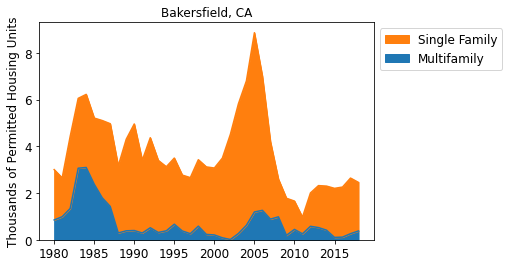

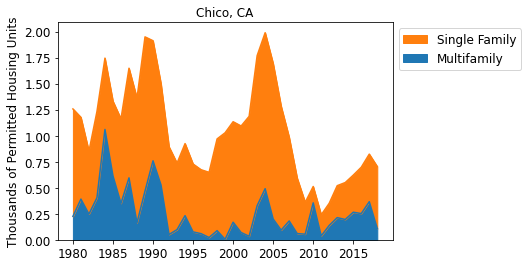

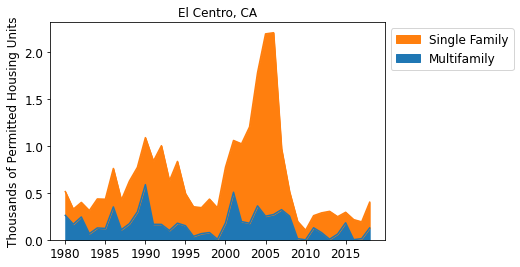

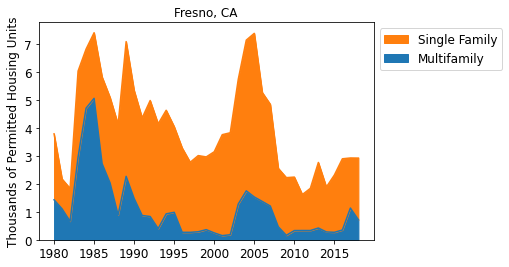

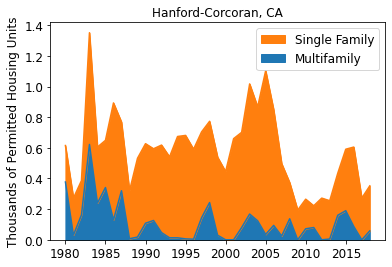

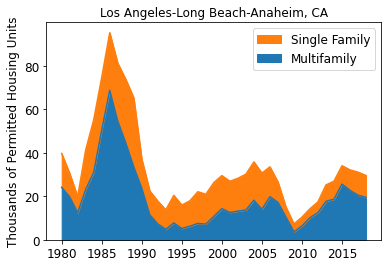

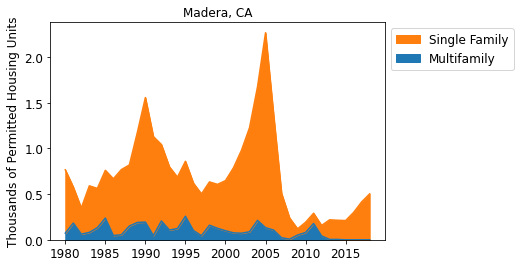

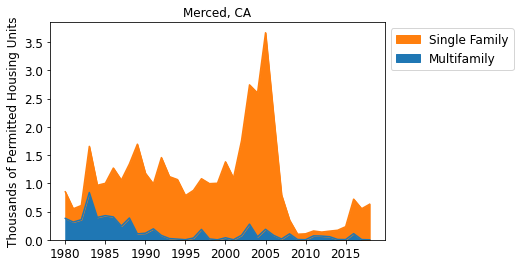

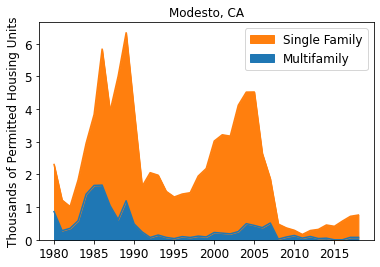

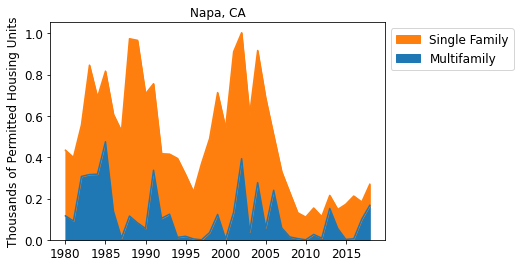

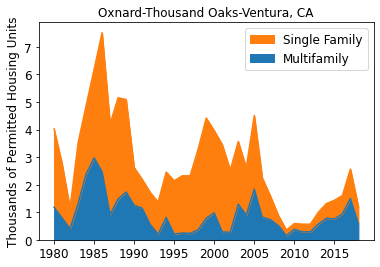

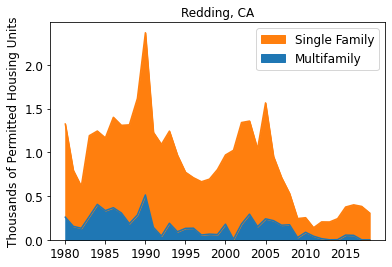

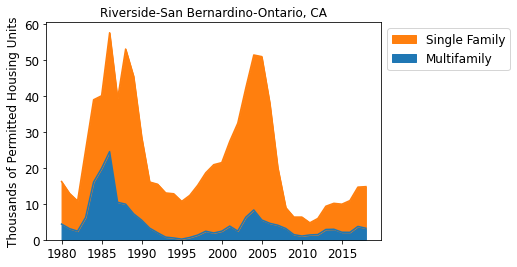

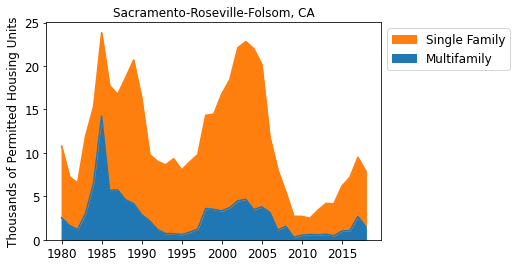

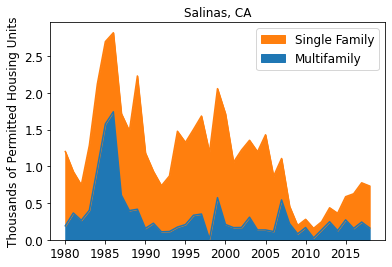

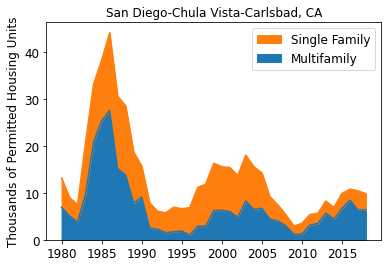

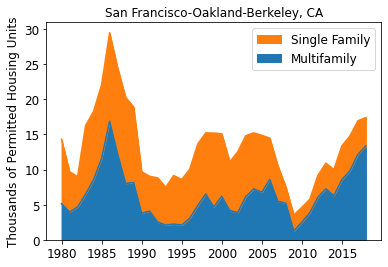

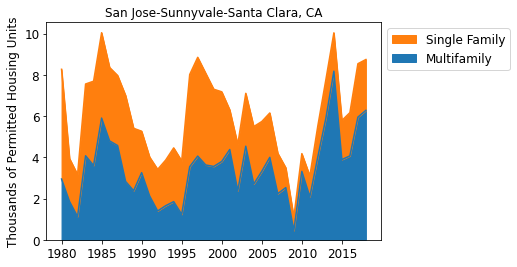

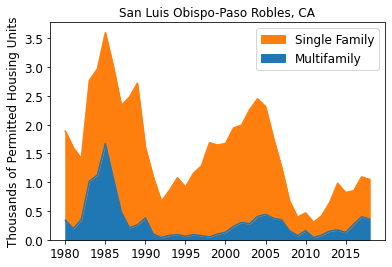

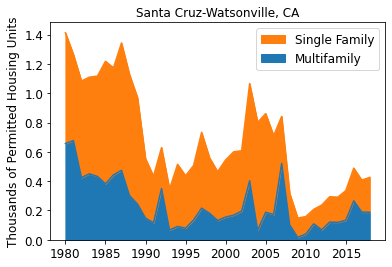

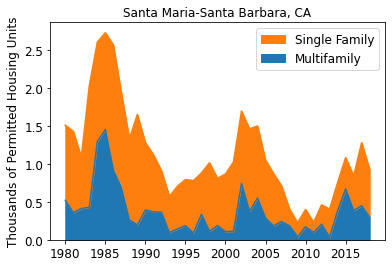

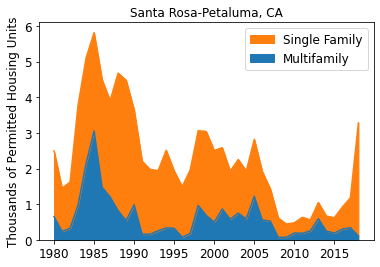

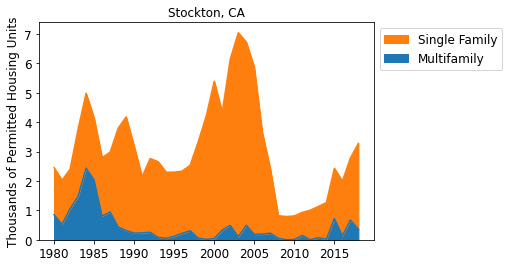

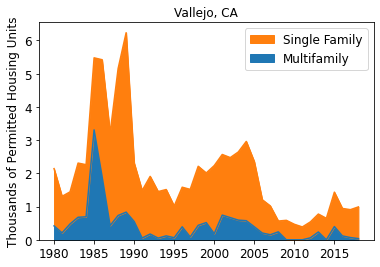

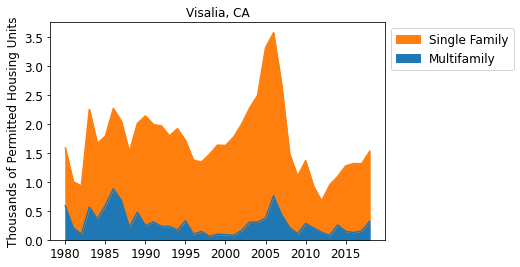

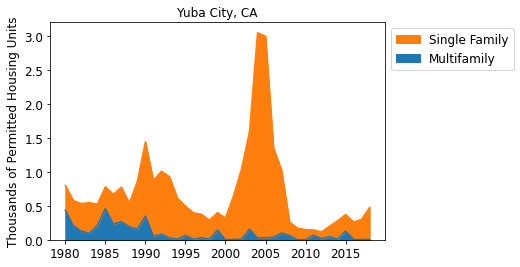

In [34]:
for code in ca_sub:
    if code not in df1.index.levels[0]:
        continue
    plot_util.generic_plot(df1.loc[code], kind='area', title=cbsa_dict[code], ylabel='Thousands of Permitted Housing Units', output_directory=charts_dir)

Population = 839631.0
Population = 218293.0
Population = 166823.0
Population = 930450.0
Population = 152982.0
Population = 12828837.0
Population = 150865.0
Population = 255793.0
Population = 514453.0
Population = 136484.0
Population = 823318.0
Population = 177223.0
Population = 4376912.0
Population = 2149127.0
Population = 415057.0
Population = 3095313.0
Population = 4266942.0
Population = 1836911.0
Population = 269637.0
Population = 262382.0
Population = 419067.0


/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Population = 483878.0


/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Population = 685306.0


/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Population = 413344.0


/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Population = 421257.0


/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Population = 166892.0


/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


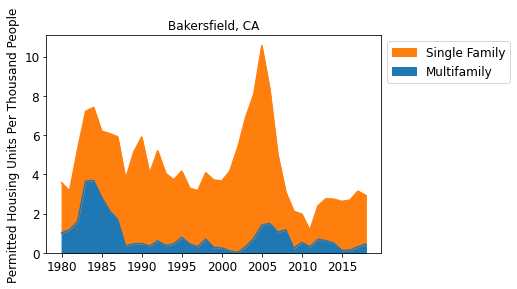

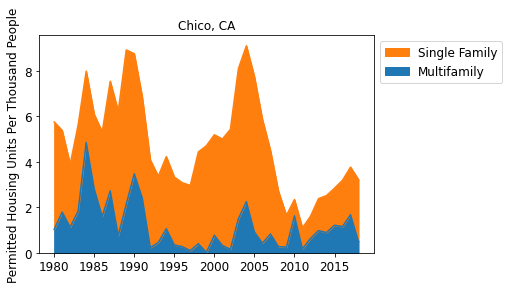

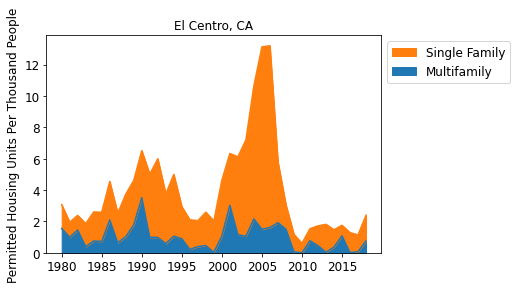

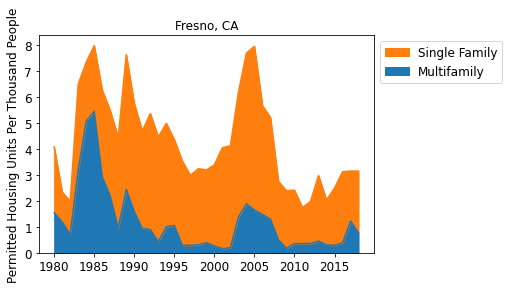

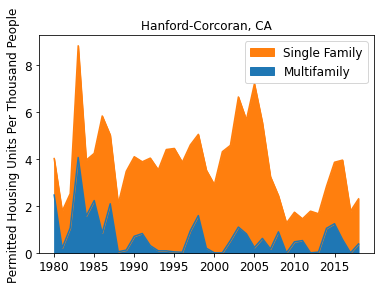

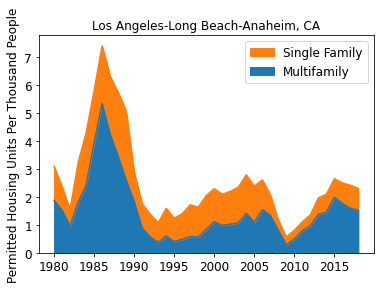

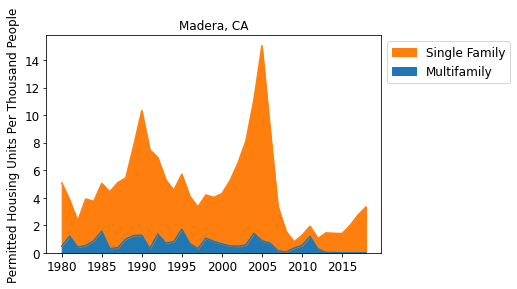

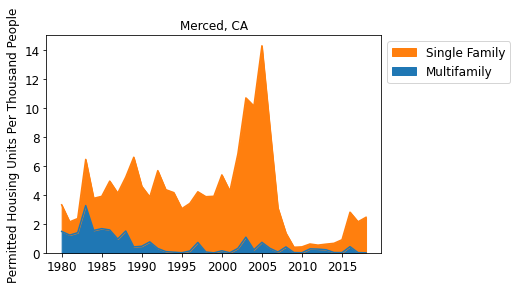

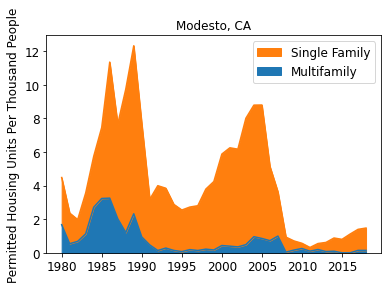

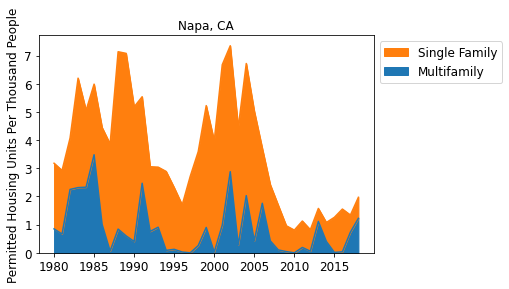

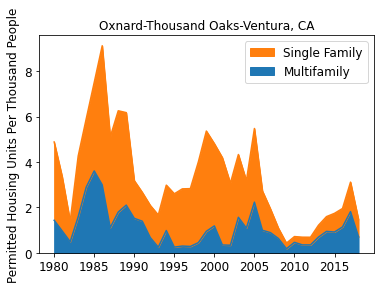

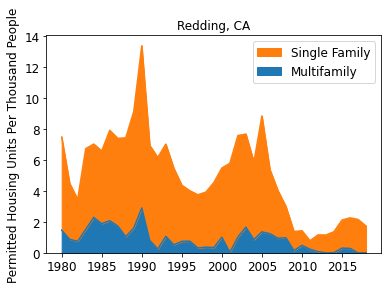

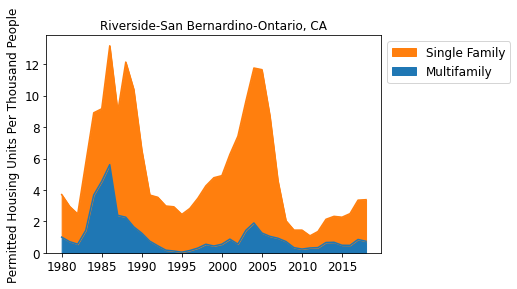

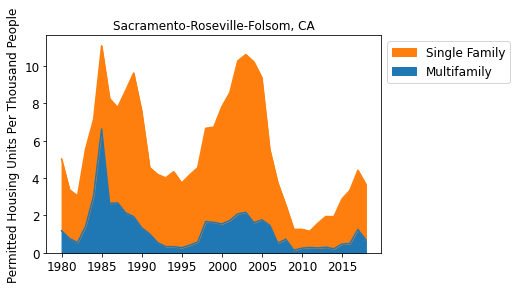

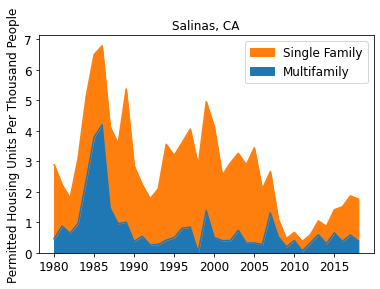

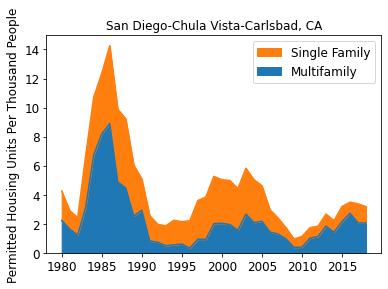

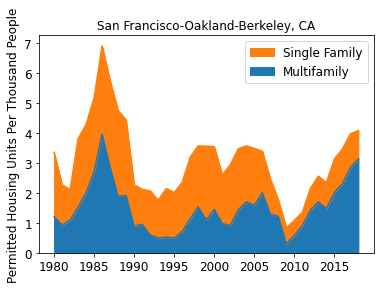

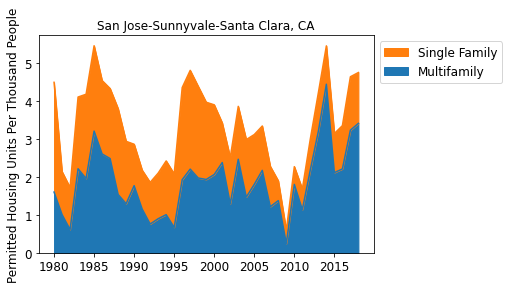

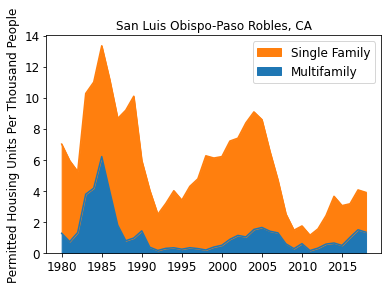

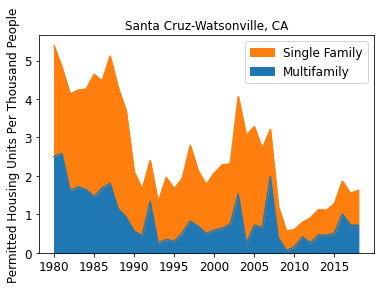

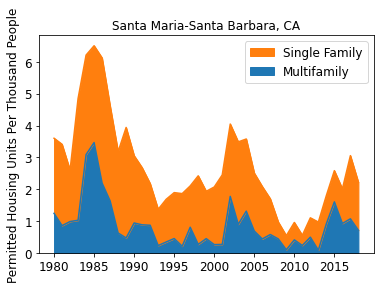

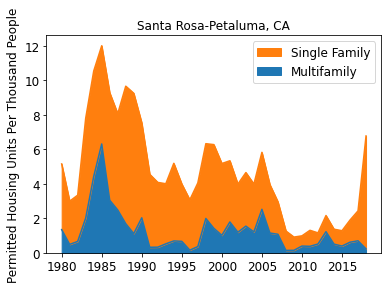

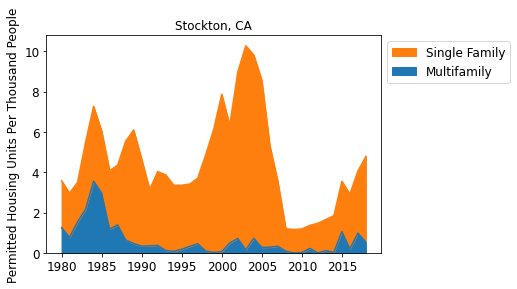

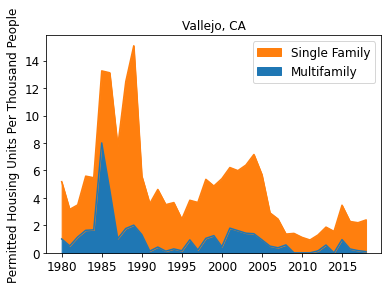

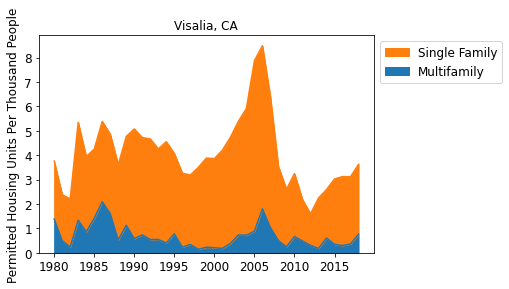

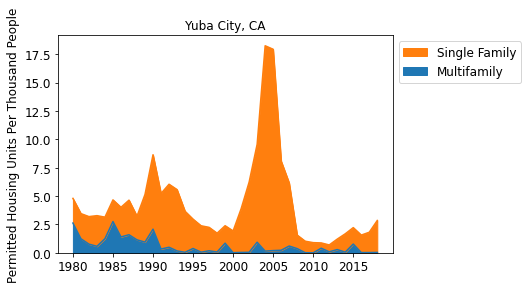

In [56]:
charts_dir_pop = input_dir / 'charts_CA_metros_bypop'
charts_dir_pop.mkdir(exist_ok=True)

for code in ca_sub:
    if code not in df1.index.levels[0]:
        continue
    #print('Population = ' + str(pop.loc[code]))
    plot_util.generic_plot(df1.loc[code] / pop.loc[code] * 1e6, kind='area', title=cbsa_dict[code],
                           ylabel='Permitted Housing Units Per Thousand People', output_directory=charts_dir_pop)

In [61]:
pop_ca = ca_codes.copy()
pop_ca['Population'] = pop
pop_ca = pop_ca[pop_ca['Population'].notnull()]
pop_ca

,CBSA Title,State Name,Population
CBSA Code,,,
12540,"Bakersfield, CA",California,839631.0
17020,"Chico, CA",California,218293.0
20940,"El Centro, CA",California,166823.0
23420,"Fresno, CA",California,930450.0
25260,"Hanford-Corcoran, CA",California,152982.0
31080,"Los Angeles-Long Beach-Anaheim, CA",California,12828837.0
31460,"Madera, CA",California,150865.0
32900,"Merced, CA",California,255793.0
33700,"Modesto, CA",California,514453.0


In [62]:
pop_ca['Population'].sum()

36457177.0